# 수행목표
- KMRD 데이터셋의 결측치, 이상치를 확인하고 시각화한다.
# 수행단계
- 데이터의 결측치 및 이상치 확인
    - 데이터에 결측치가 있는지 확인하고 처리하라.
    - 데이터에 이상치가 있는지 확인하고 처리하라.
- 시각화를 통한 탐색
    - 사용자별/영화별 평점 분포를 히스토그램, 박스 플롯 등으로 시각화하라. (Histogram)
    - 가장 많이 평가된 영화, 가장 높은 평균 평점을 받은 영화 등의 리스트를 확인하라.
    - 시간에 따른 평점의 변화나 패턴을 라인 플롯으로 확인하라. (Line chart)

In [1]:
# 이전 작업 완료하기

import pandas as pd

kmrd_castings = pd.read_csv("data/kmrd/castings.csv")
kmrd_countries = pd.read_csv("data/kmrd/countries.csv")
kmrd_genres = pd.read_csv("data/kmrd/genres.csv")
kmrd_movies = pd.read_csv("data/kmrd/movies.txt", sep="\t")
kmrd_peoples = pd.read_csv("data/kmrd/peoples.txt", sep="\t")
kmrd_rates = pd.read_csv("data/kmrd/rates.csv")


# 추가 라이브러리 설치

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
# 결측치 확인하기

kmrd_castings.isnull().sum()

movie      0
people     0
order      0
leading    0
dtype: int64

In [5]:
kmrd_movies.isnull().sum()

movie          0
title          7
title_eng      8
year         390
grade         42
dtype: int64

In [6]:
kmrd_countries.isnull().sum()

movie      0
country    0
dtype: int64

In [7]:
kmrd_genres.isnull().sum()

movie    0
genre    0
dtype: int64

In [9]:
kmrd_peoples.isnull().sum()

people        0
korean        0
original    867
dtype: int64

In [10]:
kmrd_rates.isnull().sum()

user     0
movie    0
rate     0
time     0
dtype: int64

In [16]:
kmrd_castings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9776 entries, 0 to 9775
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movie    9776 non-null   int64
 1   people   9776 non-null   int64
 2   order    9776 non-null   int64
 3   leading  9776 non-null   int64
dtypes: int64(4)
memory usage: 305.6 KB


In [17]:
kmrd_castings["movie"].value_counts(), kmrd_castings["people"].value_counts(), kmrd_castings["order"].value_counts(), kmrd_castings["leading"].value_counts()

(order
 1      988
 2      982
 3      966
 4      933
 5      854
       ... 
 97       1
 98       1
 99       1
 100      1
 101      1
 Name: count, Length: 101, dtype: int64,
 leading
 0    6889
 1    2887
 Name: count, dtype: int64)

In [19]:
kmrd_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      999 non-null    int64  
 1   title      992 non-null    object 
 2   title_eng  991 non-null    object 
 3   year       609 non-null    float64
 4   grade      957 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.1+ KB


In [21]:
kmrd_movies["movie"].value_counts(), kmrd_movies["title"].value_counts(), kmrd_movies["title_eng"].value_counts(), kmrd_movies["year"].value_counts(), kmrd_movies["grade"].value_counts(), kmrd_movies["grade"].value_counts()

(movie
 10001    1
 10672    1
 10659    1
 10660    1
 10661    1
         ..
 10339    1
 10340    1
 10341    1
 10342    1
 10999    1
 Name: count, Length: 999, dtype: int64,
 title
 노틀담의 꼽추      4
 젠다성의 포로      3
 39 계단        3
 드라큐라         3
 죽음의 카운트다운    2
             ..
 3중대의 병사들     1
 레베카          1
 말타의 매        1
 무숙자          1
 프랑켄슈타인       1
 Name: count, Length: 969, dtype: int64,
 title_eng
 1991                                                  4
 1987                                                  3
 1992                                                  2
 1990                                                  2
 Black Moon Rising , 1986                              1
                                                      ..
 Deux Hommes Dans La Ville , Two Men In Town , 1973    1
 Bilitis , 1977                                        1
 55 Days At Peking , 1963                              1
 Protocol , 1984                                       1
 Frankenstein ,

In [22]:
kmrd_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movie    1109 non-null   int64 
 1   country  1109 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.5+ KB


In [23]:
kmrd_countries["movie"].value_counts(), kmrd_countries["country"].value_counts()

(movie
 10824    5
 10314    4
 10168    3
 10570    3
 10433    3
         ..
 10353    1
 10354    1
 10355    1
 10356    1
 10999    1
 Name: count, Length: 990, dtype: int64,
 country
 미국            654
 영국             94
 한국             94
 프랑스            70
 홍콩             51
 이탈리아           43
 독일(구 서독)       20
 오스트레일리아        12
 대만             10
 스페인             7
 캐나다             6
 일본              6
 중국              5
 스웨덴             4
 러시아(구 소련)       4
 남아프리카 공화국       3
 폴란드             3
 알제리             2
 독일              2
 브라질             2
 보츠와나            2
 핀란드             1
 국가불명            1
 터키              1
 벨기에             1
 노르웨이            1
 뉴질랜드            1
 그리스             1
 덴마크             1
 아일랜드            1
 네덜란드            1
 아르헨티나           1
 벨라루스(구 소련)      1
 유고슬라비아          1
 체코              1
 멕시코             1
 Name: count, dtype: int64)

In [24]:
kmrd_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   movie   2025 non-null   int64 
 1   genre   2025 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.8+ KB


In [25]:
kmrd_genres["movie"].value_counts(), kmrd_genres["genre"].value_counts()

(movie
 10669    7
 10013    7
 10396    6
 10965    6
 10941    6
         ..
 10697    1
 10283    1
 10284    1
 10692    1
 10743    1
 Name: count, Length: 964, dtype: int64,
 genre
 드라마       529
 코미디       233
 액션        211
 멜로/로맨스    172
 스릴러       162
 모험        117
 범죄        117
 SF         80
 공포         79
 전쟁         75
 판타지        55
 미스터리       48
 뮤지컬        41
 가족         40
 서부         31
 느와르        15
 에로         10
 애니메이션       6
 다큐멘터리       3
 서사          1
 Name: count, dtype: int64)

In [26]:
kmrd_peoples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   people    7172 non-null   int64 
 1   korean    7172 non-null   object
 2   original  6305 non-null   object
dtypes: int64(1), object(2)
memory usage: 168.2+ KB


In [27]:
kmrd_peoples["people"].value_counts(), kmrd_peoples["korean"].value_counts(), kmrd_peoples["original"].value_counts

(people
 5         1
 17606     1
 22602     1
 22523     1
 22176     1
          ..
 11153     1
 11152     1
 11151     1
 11150     1
 420466    1
 Name: count, Length: 7172, dtype: int64,
 korean
 대니 하셀      2
 파멜라 브라운    2
 린 바게트      2
 에릭 로버츠     2
 존 카펜터      2
           ..
 진혜루        1
 안정국        1
 패트리샤 버치    1
 켄 핀클먼      1
 김미란        1
 Name: count, Length: 7153, dtype: int64,
 <bound method IndexOpsMixin.value_counts of 0         Adam Baldwin
 1          Adrian Lyne
 2          Aidan Quinn
 3       Akira Kurosawa
 4            Al Pacino
              ...      
 7167               NaN
 7168               NaN
 7169     Norman Wright
 7170       Graham Heid
 7171               NaN
 Name: original, Length: 7172, dtype: object>)

In [28]:
kmrd_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140710 entries, 0 to 140709
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   user    140710 non-null  int64
 1   movie   140710 non-null  int64
 2   rate    140710 non-null  int64
 3   time    140710 non-null  int64
dtypes: int64(4)
memory usage: 4.3 MB


In [29]:
kmrd_rates["user"].value_counts(), kmrd_rates["movie"].value_counts(), kmrd_rates["rate"].value_counts(), kmrd_rates["time"].value_counts()

(user
 465      413
 44       375
 1051     322
 170      278
 110      262
         ... 
 24793      1
 24794      1
 24796      1
 24797      1
 52027      1
 Name: count, Length: 52028, dtype: int64,
 movie
 10200    7265
 10048    7016
 10102    4391
 10016    4029
 10936    3690
          ... 
 10939       1
 10731       1
 10180       1
 10853       1
 10974       1
 Name: count, Length: 600, dtype: int64,
 rate
 10    94411
 9     14684
 8     11514
 7      6553
 1      5199
 6      3642
 5      2040
 4      1083
 3       813
 2       771
 Name: count, dtype: int64,
 time
 1071932400    25
 1072018800    23
 1071586800    23
 1071500400    23
 1071414000    20
               ..
 1496088120     1
 1495725480     1
 1340774880     1
 1324007760     1
 1227036960     1
 Name: count, Length: 136972, dtype: int64)

In [50]:
kmrd_rates["rate"].value_counts()

rate
10    94411
9     14684
8     11514
7      6553
1      5199
6      3642
5      2040
4      1083
3       813
2       771
Name: count, dtype: int64

In [30]:
kmrd_rates["time"].min()

np.int64(1069340400)

In [31]:
kmrd_rates["time"].max()

np.int64(1576525860)

In [32]:
kmrd_rates['user'].nunique(), kmrd_rates['movie'].nunique()

(52028, 600)

In [33]:
# sparsity 계산하기

1 - (len(kmrd_rates) / (kmrd_rates['user'].nunique() * kmrd_rates['movie'].nunique()))

0.995492491222675

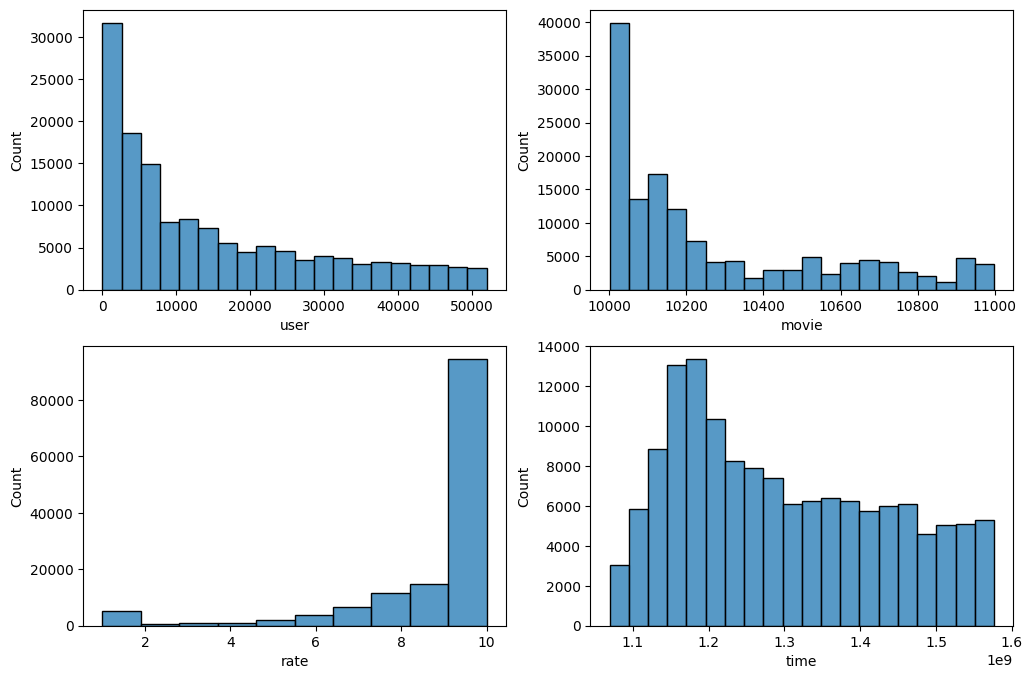

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(kmrd_rates['user'], bins=20, ax=axes[0, 0])
sns.histplot(kmrd_rates['movie'], bins=20, ax=axes[0, 1])
sns.histplot(kmrd_rates['rate'], bins=10, ax=axes[1, 0])
sns.histplot(kmrd_rates['time'], bins=20, ax=axes[1, 1])

plt.show()

In [58]:
kmrd_rates['time'] = pd.to_datetime(kmrd_rates['time'], unit='s')
kmrd_rates['time'].min(), kmrd_rates['time'].max()

(Timestamp('2003-11-20 15:00:00'), Timestamp('2019-12-16 19:51:00'))

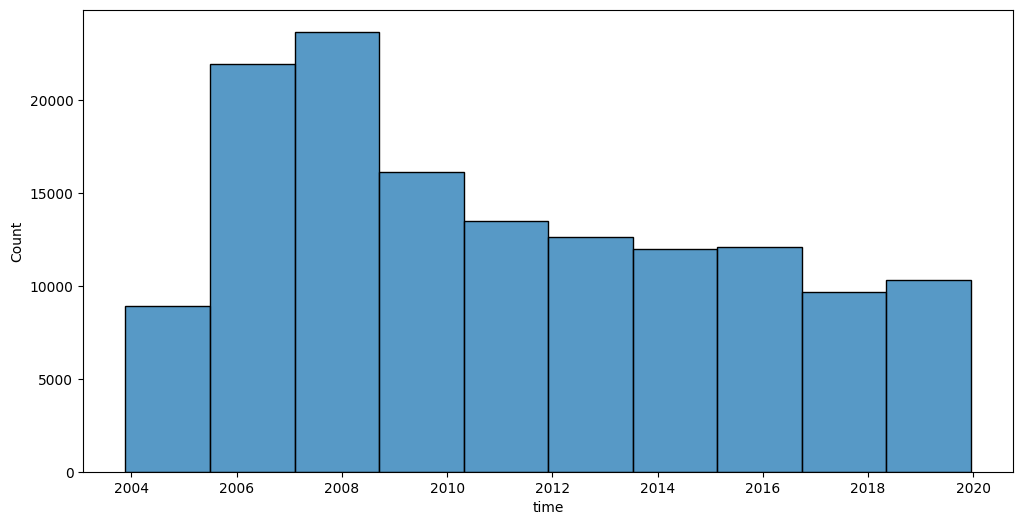

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.histplot(kmrd_rates['time'], bins=10, ax=ax)

plt.show()

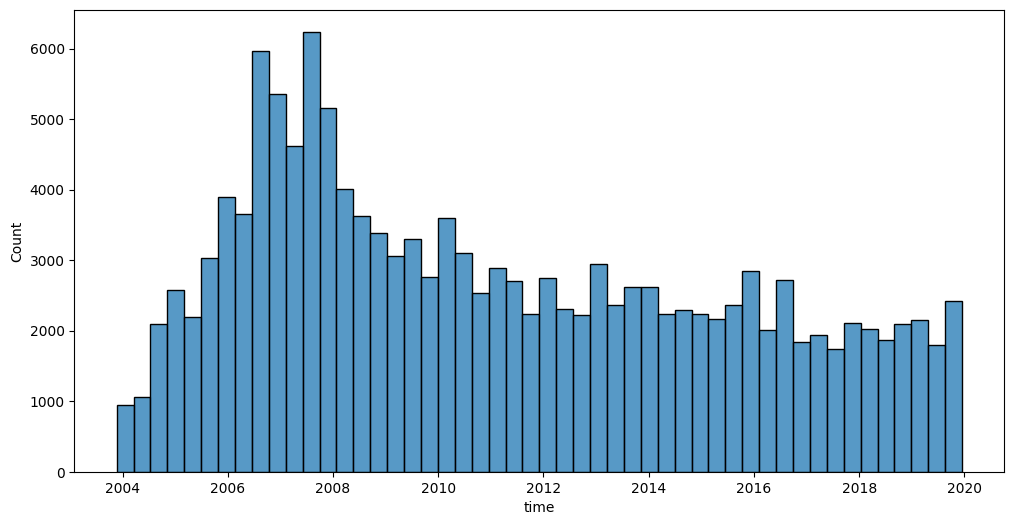

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.histplot(kmrd_rates['time'], bins=50, ax=ax)

plt.show()

In [64]:
# 가장 많이 평가된 영화

kmrd_rates['movie'].value_counts().idxmax()

np.int64(10200)

In [65]:
# 가장 높은 평균 평점 받은 영화

kmrd_rates.groupby('movie')['rate'].mean().idxmax()

np.int64(10180)

/var/folders/ph/w9kxghkd5959cwdbzq0m7_9m0000gn/T/ipykernel_45871/1655080770.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  kmrd_rates


[]

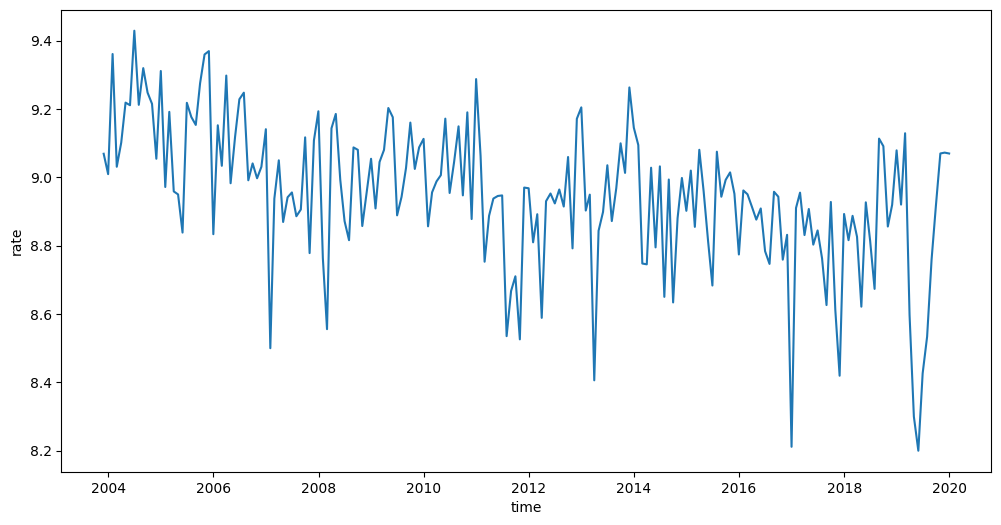

In [73]:
# 시간에 따른 평점의 평균 변화 라인플롯

df_monthly = (
    kmrd_rates
    .set_index('time')
    .resample('M')
    ['rate'].mean()
    .reset_index()
)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.lineplot(data=df_monthly, x="time", y="rate", ax=ax)

plt.plot()